In [1]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
from PIL import Image

In [2]:

ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = np.array(
    [ia.quokka(size=(64, 64)) for _ in range(32)],
    dtype=np.uint8
)



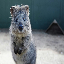

In [3]:
img = Image.fromarray(images[4], 'RGB')
img

In [3]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips with 0.5 probability 
    iaa.Crop(percent=(0, 0.1)), # random crops
    
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(0.5,iaa.GaussianBlur(sigma=(0, 0.5))),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.75, 1.5)),
    
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order


In [4]:
images_aug = seq(images=images)

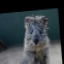

In [13]:
img = Image.fromarray(images_aug[6], 'RGB')
img

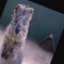

In [7]:
img

In [3]:
from utils.utils_resnet import *
import os

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [18]:
img = tf.io.read_file("/home/jl5307/current_research/AMD_prediction/img_data/img_files/51011/51011 QUA F2 LE LS.jpg")
img = tf.io.decode_jpeg(img)

In [6]:
img1 = parse_image("/home/jl5307/current_research/AMD_prediction/img_data/img_files/51011/51011 QUA F2 LE LS.jpg", 256, 0.875)

In [7]:
aug = set_augmenter()

In [14]:
img2 = parse_image("/home/jl5307/current_research/AMD_prediction/img_data/img_files/51011/51011 QUA F2 LE LS.jpg", 256, 0.875, augmenter=aug)

In [13]:
import matplotlib.pyplot as plt

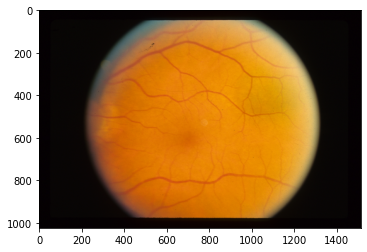

In [19]:
plt.imshow(img)

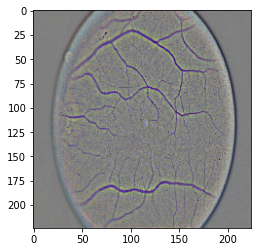

In [16]:
plt.imshow(img1)

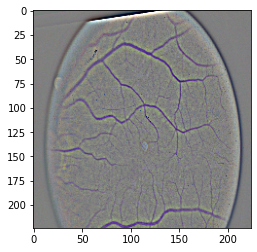

In [17]:
plt.imshow(img2)

In [12]:
import tensorflow_addons as tfa
import tensorflow as tf
import os
import numpy as np

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [4]:
def read_img(img_file):

    image = tf.io.read_file(img_file)
    image = tf.io.decode_jpeg(image)

    return image.numpy()

In [12]:
img1 = read_img("/home/jl5307/current_research/AMD_prediction/img_data/img_files/51011/51011 QUA F2 LE LS.jpg")
img2 = read_img("/home/jl5307/current_research/AMD_prediction/img_data/img_files/51011/51011 QUA F2 LE LS.jpg")

NameError: name 'read_img' is not defined

In [16]:
il = np.array([img1, img2])

In [24]:
tfa.image.gaussian_filter2d(il, filter_shape=(0,0), sigma=10., padding="CONSTANT")

ValueError: in user code:

    /home/jl5307/current_research/virtualenvs/python3-workspace/lib/python3.6/site-packages/tensorflow_addons/image/filters.py:293 gaussian_filter2d  *
        image = _pad(image, filter_shape, mode=padding, constant_values=constant_values)
    /home/jl5307/current_research/virtualenvs/python3-workspace/lib/python3.6/site-packages/tensorflow_addons/image/filters.py:59 _pad  *
        return tf.pad(image, paddings, mode=mode, constant_values=constant_values)
    /home/jl5307/current_research/virtualenvs/python3-workspace/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:201 wrapper  **
        return target(*args, **kwargs)
    /home/jl5307/current_research/virtualenvs/python3-workspace/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:3355 pad_v2
        return pad(tensor, paddings, mode, name, constant_values)
    /home/jl5307/current_research/virtualenvs/python3-workspace/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/jl5307/current_research/virtualenvs/python3-workspace/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:3425 pad
        tensor, paddings, constant_values, name=name)
    /home/jl5307/current_research/virtualenvs/python3-workspace/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py:6569 pad_v2
        constant_values=constant_values, name=name)
    /home/jl5307/current_research/virtualenvs/python3-workspace/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:750 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /home/jl5307/current_research/virtualenvs/python3-workspace/lib/python3.6/site-packages/tensorflow/python/framework/func_graph.py:592 _create_op_internal
        compute_device)
    /home/jl5307/current_research/virtualenvs/python3-workspace/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:3536 _create_op_internal
        op_def=op_def)
    /home/jl5307/current_research/virtualenvs/python3-workspace/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:2016 __init__
        control_input_ops, op_def)
    /home/jl5307/current_research/virtualenvs/python3-workspace/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Paddings must be non-negative for '{{node gaussian_filter2d/PadV2}} = PadV2[T=DT_FLOAT, Tpaddings=DT_INT32](gaussian_filter2d/Cast, gaussian_filter2d/PadV2/paddings, gaussian_filter2d/Const)' with input shapes: [2,1024,1513,3], [4,2], [] and with computed input tensors: input[1] = <[0 0][-1 0][-1 0][0 0]>.


In [1]:
import pickle
import tensorflow as tf
import os

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [3]:
def load_data(data_path):
    data = pickle.load(open(data_path, 'rb'))

    return data

In [11]:
img_data_dict = load_data("/home/jl5307/current_research/AMD_prediction/img_data/img_data_score_dict.pkl")

In [17]:
def img_size_check(data_root_path, img_data_mapping_dict):
    
    train_img_list = list(img_data_mapping_dict["train_set"].keys())
    validation_img_list = list(img_data_mapping_dict["validation_set"].keys())
    test_img_list = list(img_data_mapping_dict["test_set"].keys())
    unique_shape = set()
    
    print("checking train set...")
    count_idx = 0
    for idx, eye in enumerate(train_img_list):
        
        if idx % 100 == 0:
            print("{} imgs processed...".format(count_idx*100))
            count_idx += 1
    
        eye_filename = data_root_path + eye.split(" ")[0] + "/" + eye
        image = tf.io.read_file(eye_filename)
        image = tf.io.decode_jpeg(image)
        shape = image.numpy().shape
        unique_shape.add(shape)
        
    print("checking validation set...")
    count_idx = 0
    for idx, eye in enumerate(validation_img_list):
        
        if idx % 100 == 0:
            print("{} imgs processed...".format(count_idx*100))
            count_idx += 1
            
        eye_filename = data_root_path + eye.split(" ")[0] + "/" + eye
        image = tf.io.read_file(eye_filename)
        image = tf.io.decode_jpeg(image)
        shape = image.numpy().shape
        unique_shape.add(shape)

    print("checking test set...")
    count_idx = 0
    for idx, eye in enumerate(test_img_list):
        
        if idx % 100 == 0:
            print("{} imgs processed...".format(count_idx*100))
            count_idx += 1
            
        eye_filename = data_root_path + eye.split(" ")[0] + "/" + eye
        image = tf.io.read_file(eye_filename)
        image = tf.io.decode_jpeg(image)
        shape = image.numpy().shape
        unique_shape.add(shape)
        
    return unique_shape

In [19]:
us = img_size_check("/home/jl5307/current_research/AMD_prediction/img_data/img_files/", img_data_dict)

checking train set...
0 imgs processed...
100 imgs processed...
200 imgs processed...
300 imgs processed...
400 imgs processed...
500 imgs processed...
600 imgs processed...
700 imgs processed...
800 imgs processed...
900 imgs processed...
1000 imgs processed...
1100 imgs processed...
1200 imgs processed...
1300 imgs processed...
1400 imgs processed...
1500 imgs processed...
1600 imgs processed...
1700 imgs processed...
1800 imgs processed...
1900 imgs processed...
2000 imgs processed...
2100 imgs processed...
2200 imgs processed...
2300 imgs processed...
2400 imgs processed...
2500 imgs processed...
2600 imgs processed...
2700 imgs processed...
2800 imgs processed...
2900 imgs processed...
3000 imgs processed...
3100 imgs processed...
3200 imgs processed...
3300 imgs processed...
3400 imgs processed...
3500 imgs processed...
3600 imgs processed...
3700 imgs processed...
3800 imgs processed...
3900 imgs processed...
4000 imgs processed...
4100 imgs processed...
4200 imgs processed...
4

34600 imgs processed...
34700 imgs processed...
34800 imgs processed...
34900 imgs processed...
35000 imgs processed...
35100 imgs processed...
35200 imgs processed...
35300 imgs processed...
35400 imgs processed...
35500 imgs processed...
35600 imgs processed...
35700 imgs processed...
35800 imgs processed...
35900 imgs processed...
36000 imgs processed...
36100 imgs processed...
36200 imgs processed...
36300 imgs processed...
36400 imgs processed...
36500 imgs processed...
36600 imgs processed...
36700 imgs processed...
36800 imgs processed...
36900 imgs processed...
37000 imgs processed...
37100 imgs processed...
37200 imgs processed...
37300 imgs processed...
37400 imgs processed...
37500 imgs processed...
37600 imgs processed...
37700 imgs processed...
37800 imgs processed...
37900 imgs processed...
38000 imgs processed...
38100 imgs processed...
38200 imgs processed...
38300 imgs processed...
38400 imgs processed...
38500 imgs processed...
38600 imgs processed...
38700 imgs proce

In [20]:
us

{(438, 557, 3),
 (450, 557, 3),
 (557, 735, 3),
 (557, 770, 3),
 (747, 901, 3),
 (889, 960, 3),
 (1024, 1180, 3),
 (1024, 1238, 3),
 (1024, 1239, 3),
 (1024, 1287, 3),
 (1024, 1289, 3),
 (1024, 1313, 3),
 (1024, 1326, 3),
 (1024, 1340, 3),
 (1024, 1361, 3),
 (1024, 1370, 3),
 (1024, 1411, 3),
 (1024, 1500, 3),
 (1024, 1513, 3),
 (1024, 1532, 3),
 (1024, 1544, 3),
 (1054, 1024, 3)}